In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, LeakyReLU

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
lReLU = LeakyReLU()
model = Sequential([
    Flatten(input_shape=(28,28), name='Input'),
    Dense(16, activation=lReLU, name='Hidden_1'),
    Dense(16, activation='relu', name='Hidden_2'),
    Dense(10, name='Classes', activation = Softmax())
], name = 'Classifier')


In [4]:
# Print the model summary
model.summary()


Model: "Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 784)               0         
_________________________________________________________________
Hidden_1 (Dense)             (None, 16)                12560     
_________________________________________________________________
Hidden_2 (Dense)             (None, 16)                272       
_________________________________________________________________
Classes (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, LeakyReLU, Softmax

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3,3), input_shape=(28,28,1), padding='same', strides=1, activation=LeakyReLU(alpha=0.3), name='input_images'),
    MaxPooling2D(pool_size=(3,3), strides=2, name='pooling'),
    Flatten(name='flatten'),
    Dense(10, name='classes', activation='softmax')
])


In [7]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_images (Conv2D)        (None, 28, 28, 16)        160       
_________________________________________________________________
pooling (MaxPooling2D)       (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
classes (Dense)              (None, 10)                27050     
Total params: 27,210
Trainable params: 27,210
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer = tf.keras.optimizers.Nadam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [9]:
# Print the resulting model attributes
print(model.optimizer)
print(model.loss)
print(model.metrics)


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
# Print the shape of the training data
print(train_images.shape)
print(train_labels.shape)


(60000, 28, 28)
(60000,)


In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [14]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images/255.
test_images = test_images/255.


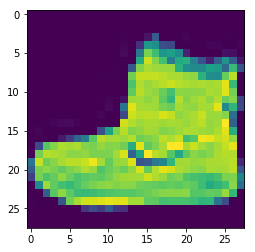

In [15]:
# Display one of the images

i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()

#### Fit the model

In [16]:
# Fit the model
history = model.fit(train_images[...,np.newaxis], train_labels, validation_split=0.1, epochs=10, batch_size=256, verbose=1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 75s 1ms/sample - loss: 0.7102 - accuracy: 0.7638 - val_loss: 0.4651 - val_accuracy: 0.8340
Epoch 2/10
54000/54000 [==============================] - 72s 1ms/sample - loss: 0.4419 - accuracy: 0.8451 - val_loss: 0.4150 - val_accuracy: 0.8517
Epoch 3/10
54000/54000 [==============================] - 73s 1ms/sample - loss: 0.3901 - accuracy: 0.8631 - val_loss: 0.3715 - val_accuracy: 0.8692
Epoch 4/10
54000/54000 [==============================] - 74s 1ms/sample - loss: 0.3606 - accuracy: 0.8738 - val_loss: 0.3616 - val_accuracy: 0.8735
Epoch 5/10
54000/54000 [==============================] - 72s 1ms/sample - loss: 0.3402 - accuracy: 0.8812 - val_loss: 0.3380 - val_accuracy: 0.8792
Epoch 6/10
54000/54000 [==============================] - 72s 1ms/sample - loss: 0.3275 - accuracy: 0.8856 - val_loss: 0.3309 - val_accuracy: 0.8832
Epoch 7/10
54000/54000 [==============================] -

#### Plot training history

In [17]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head(10)

,loss,accuracy,val_loss,val_accuracy
0,0.710180,0.763833,0.465133,0.834000
1,0.441891,0.845074,0.415030,0.851667
2,0.390113,0.863056,0.371464,0.869167
3,0.360550,0.873815,0.361614,0.873500
4,0.340165,0.881222,0.338007,0.879167
5,0.327517,0.885556,0.330866,0.883167
6,0.316442,0.889500,0.323674,0.884500
7,0.308005,0.892482,0.315673,0.887333
8,0.300625,0.895481,0.312050,0.890667
9,0.294094,0.897426,0.304951,0.892333


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

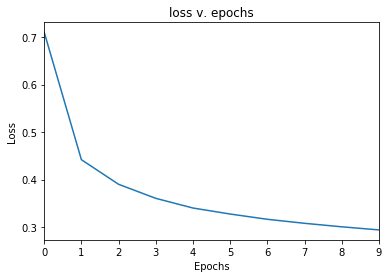

In [18]:
# Make a plot for the loss
loss_plt = df.plot(y="loss", title="loss v. epochs", legend=False)
loss_plt.set(xlabel="Epochs", ylabel="Loss")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

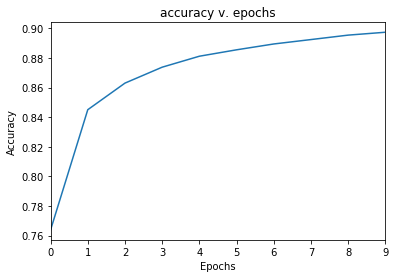

In [19]:
# Make a plot for the accuracy

acc_plt = df.plot(y="accuracy", title="accuracy v. epochs", legend=False)
acc_plt.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

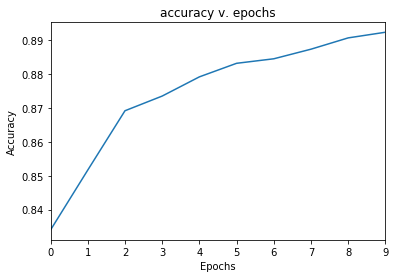

In [21]:
# Make a plot for the additional metric
loss_plt = df.plot(y="val_accuracy", title="accuracy v. epochs", legend=False)
loss_plt.set(xlabel="Epochs", ylabel="Accuracy")


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [22]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [26]:
# Evaluate the model
model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)


10000/1 - 7s - loss: 0.3511 - accuracy: 0.8889


[0.32051866714954375, 0.8889]

#### Make predictions from the model

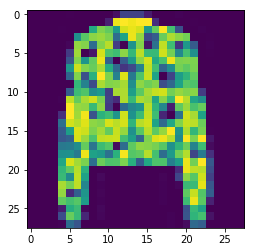

Label: Coat


In [27]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [32]:
# Get the model predictions
probs = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(probs)
labels[np.argmax(probs)]


[[8.76065405e-06 1.67898918e-06 1.88892484e-02 1.20260484e-04
  9.51504886e-01 2.49763965e-09 2.92061511e-02 1.01726766e-13
  2.69097392e-04 3.38958778e-10]]


'Coat'